# Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis (EDA) on the cleaned credit default dataset. The dataset was preprocessed to handle missing values, placeholder codes, and duplicate entries.

### EDA Objectives

- **Understand feature distributions and relationships** — Gain insights into how variables interact.
- **Identify patterns and outliers** — Spot trends and potential anomalies in the data.
- **Surface opportunities for feature engineering** — Reveal transformations or new features that could boost model performance.
- **Avoid data leakage** — Ensure only training data is used during EDA to maintain model integrity.



## Load Cleaned Dataset

We begin by loading the cleaned dataset generated during the preprocessing stage:

In [2]:
import sys; sys.path.append('..')
import pandas as pd

df = pd.read_csv('../data/clean.csv')

# quick preview to ensure correct loading
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Dataset Overview

Now that we have loaded the cleaned credit default dataset, let's examine its basic shape and structure.
- Rows: 29,964 customer accounts
- Columns: 24 features (including the target variable)

All features are numeric and stored as `int64`, occupying ~5.5 MB of memory.

> Note: Feature names are anonymized (e.g., X1, X2) and will be decoded as part of later analysis.


In [3]:
df.shape

(29965, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      29965 non-null  int64
 1   X2      29965 non-null  int64
 2   X3      29965 non-null  int64
 3   X4      29965 non-null  int64
 4   X5      29965 non-null  int64
 5   X6      29965 non-null  int64
 6   X7      29965 non-null  int64
 7   X8      29965 non-null  int64
 8   X9      29965 non-null  int64
 9   X10     29965 non-null  int64
 10  X11     29965 non-null  int64
 11  X12     29965 non-null  int64
 12  X13     29965 non-null  int64
 13  X14     29965 non-null  int64
 14  X15     29965 non-null  int64
 15  X16     29965 non-null  int64
 16  X17     29965 non-null  int64
 17  X18     29965 non-null  int64
 18  X19     29965 non-null  int64
 19  X20     29965 non-null  int64
 20  X21     29965 non-null  int64
 21  X22     29965 non-null  int64
 22  X23     29965 non-null  int64
 23  Y       299

## Train-Test Split

To avoid data leakage during modeling, we split the dataset into training and test sets.

We stratify on the target variable (`Y`) to ensure the same class distribution across both training and testing sets.


Train size: 14,982  
Test size: 14,983  
Train default rate: 22.13%  
Test default rate: 22.13%


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into testing and training sets. 
train, test = train_test_split(df, test_size=0.5, random_state=42, stratify=df['Y'])

# Verify correct splits
print(f"Train size: {train.shape[0]}, Test size: {test.shape[0]}")
print(f"Train default rate: {train['Y'].mean():.2%}")
print(f"Test default rate: {test['Y'].mean():.2%}")

Train size: 14982, Test size: 14983
Train default rate: 22.13%
Test default rate: 22.13%


We now save the datasets to CSV files for consistency.


In [6]:
train.to_csv('../data/clean_train.csv', index=False)
test.to_csv('../data/clean_test.csv', index=False)

## Begin EDA on Training Set

We will begin our detailed exploratory data analysis (EDA) by loading the training data.

We limit EDA to the training set to avoid data leakage. Test data will be reserved for model evaluation only.


In [7]:
df = pd.read_csv('../data/clean_train.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,30000,2,2,1,27,2,0,0,2,2,...,24572,24872,25427,1700,3300,1000,1000,1100,1000,1
1,70000,2,1,2,27,-1,2,-1,-1,-1,...,11889,0,4280,0,4885,11889,0,4280,20600,0
2,140000,2,1,2,27,0,0,0,0,0,...,21209,25503,27918,2000,3000,3000,5000,3000,10000,0
3,200000,1,1,1,44,-1,-1,-1,-2,-1,...,0,708,15500,757,0,0,708,15699,0,0
4,60000,2,1,2,29,1,-1,2,-1,-1,...,3697,0,532,351,0,3697,0,532,0,1


## X1: Credit Limit (NT$)

- Discrete intervals (steps of 10,000)
- Positively skewed
- Most frequent value: 50,000 (11% of customers)

Let’s begin by exploring the data type and descriptive statistics of this feature.


In [8]:
df['X1'].dtype

dtype('int64')

In [9]:
df['X1'].sort_values(ascending=True).unique()


array([  10000,   16000,   20000,   30000,   40000,   50000,   60000,
         70000,   80000,   90000,  100000,  110000,  120000,  130000,
        140000,  150000,  160000,  170000,  180000,  190000,  200000,
        210000,  220000,  230000,  240000,  250000,  260000,  270000,
        280000,  290000,  300000,  310000,  320000,  330000,  340000,
        350000,  360000,  370000,  380000,  390000,  400000,  410000,
        420000,  430000,  440000,  450000,  460000,  470000,  480000,
        490000,  500000,  510000,  520000,  530000,  540000,  550000,
        560000,  570000,  580000,  590000,  600000,  610000,  620000,
        630000,  640000,  650000,  660000,  670000,  680000,  700000,
        710000,  720000,  740000,  750000,  780000,  800000, 1000000])

In [10]:
df['X1'].astype('object').describe()

count     14982
unique       77
top       50000
freq       1641
Name: X1, dtype: int64

There are 77 unique credit limit values, ranging from 10,000 to 1,000,000.

Values are in fixed intervals of 10,000.

In [11]:
1641/14982

0.10953143772527033

Lets plot the distribution as a histogram.

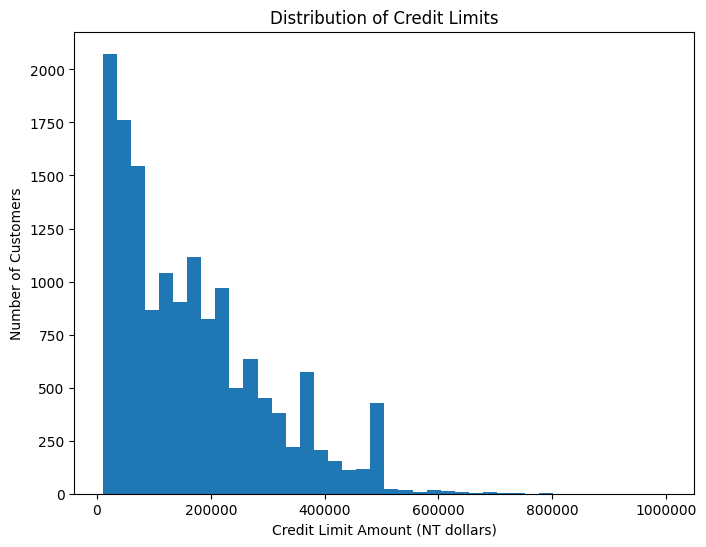

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))
plt.hist(df['X1'], bins=40)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of Credit Limits')
plt.ylabel('Number of Customers')
plt.xlabel('Credit Limit Amount (NT dollars)')
plt.show()

**Visual inference:** Distribution is right-skewed (positively skewed), with a large portion of customers are concentrated at lower credit limits.

In [13]:
from scipy.stats import skew

x1_skewness = skew(df['X1'])
print(f'Skewness: {x1_skewness}')

Skewness: 0.999812837812092


Skewness = 0.9998, confirming the positive skew in distribution

**PREPROCESSING NOTE:** 
- log-transforming this feature may improve modeling. 

To analyze the relationship between credit limit and default rate:
- We group average default rate for each unique credit limit and fit a linear regression line to visualize trend.

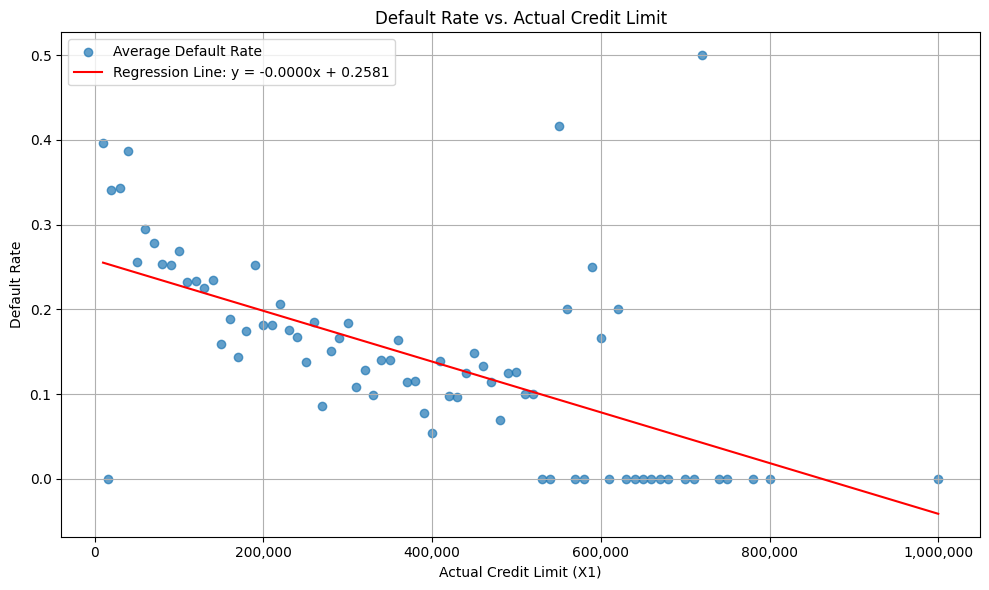

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

grouped = df.groupby('X1')['Y'].mean().reset_index()
grouped.columns = ['CreditLimit', 'DefaultRate']

x = grouped['CreditLimit']
y = grouped['DefaultRate']

m, b = np.polyfit(x, y, 1)
regression_line = m * x + b

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Average Default Rate', alpha=0.7)
plt.plot(x, regression_line, color='red', label=f'Regression Line: y = {m:.4f}x + {b:.4f}')

# Format x-axis to use regular integers (not scientific notation)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Actual Credit Limit (X1)')
plt.ylabel('Default Rate')
plt.title('Default Rate vs. Actual Credit Limit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Clear negative trend: As credit limit increases, default rate tends to decrease. However, some outliers and plateaus exist at higher credit limits.

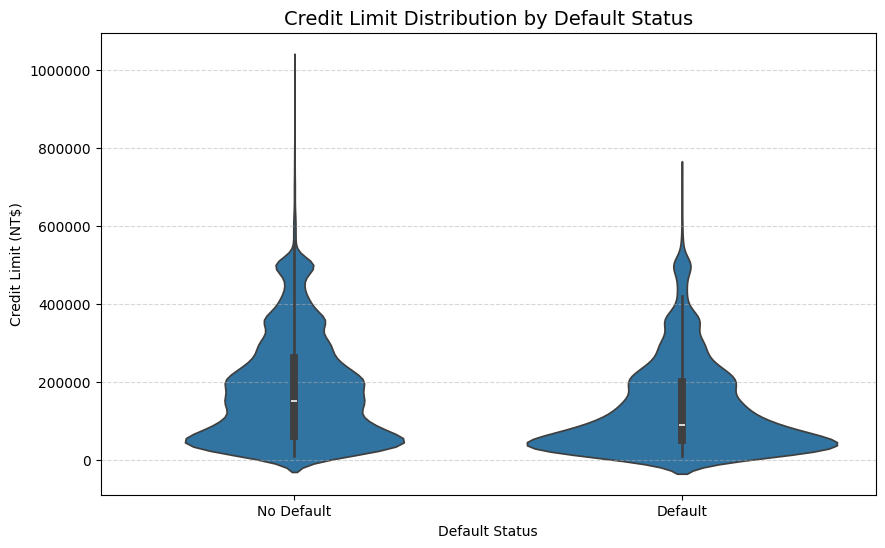

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.violinplot(
    x='Y', 
    y='X1', 
    data=df, 
    inner='box', 
)

plt.xticks([0, 1], ['No Default', 'Default'])
plt.title('Credit Limit Distribution by Default Status', fontsize=14)
plt.xlabel('Default Status')
plt.ylabel('Credit Limit (NT$)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


Customers who defaulted tend to have lower credit limits, while Non-defaulting customers are spread across higher ranges.

Lets use spearman correlation to verify. 

In [16]:
from scipy.stats import spearmanr

corr, p = spearmanr(df['X1'], df['Y'])

print("Spearman Correlation:", corr)
print("P-value:", p)

Spearman Correlation: -0.1662904779037975
P-value: 2.372840062644544e-93


The spearman correlation test confirms a weak negative relationship between default rate and credit limit. Additionally, the p-value gathered is less than 0.01 indicating strong statistical signifigance. 

### Final Summary: X1 - Credit Limit:
- X1 is an ordinal, discrete variable reflecting the creditworthiness of a customer.
- Higher credit limits correlate with lower default rates, both visually and statistically.
- Despite statistical significance, the strength of the correlation is weak — it is not a strong predictor on its own.


------------------------


## X2: Gender

(1 = Male, 2 = Female)

As described, X2 represents the customer's gender — also sometimes referred to as sex — where `1` stands for male and `2` for female.

Let’s start by checking the data type and unique values.


In [17]:
df['X2'].dtype

dtype('int64')

The number of unique values is 2 as expected, since gender is a binary categorical feature.

Even though the data type is currently numerical, this is a nominal (non-ordinal) category.

In [18]:
df['X2'].unique()

array([2, 1])

**PREPROCESSING NOTES:**

- Since the data range is binary, we can potentially reduce memory by changing its data type (e.g., to `int8` or `category`).
- Since this feature is categorically nominal, a one-hot encoding would be appropriate for modeling.

Let's check whether the gender distribution is balanced.


In [19]:
df['X2'].astype('object').describe().T

count     14982
unique        2
top           2
freq       9007
Name: X2, dtype: int64

In [20]:
12653/20975

0.6032419547079857

The gender distribution is not balanced — around 60% of the customer accounts are associated with females.

Now let's measure the default rate by gender to determine if the target variable (`Y`) varies between groups.


The summary table below shows both the count of customers and the average default rate per gender:

- Males (`X2=1`) have a higher default rate (~24%)
- Females (`X2=2`) have a lower default rate (~21%)

This indicates a potential difference in behavior between genders.


In [21]:
gender_summary = df.groupby('X2')['Y'].agg(['count', 'mean'])
gender_summary.columns = ['GenderCount', 'DefaultRate']
gender_summary

,GenderCount,DefaultRate
X2,,
1,5975,0.240167
2,9007,0.208727


We can visualize the gender-default relationship using a proportions bar plot:


The stacked bar chart below confirms the imbalance in default rates between male and female customers.


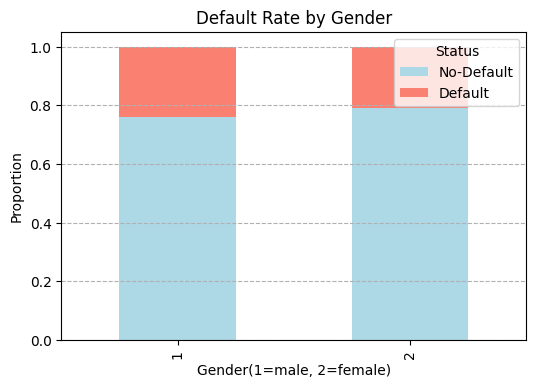

In [22]:
import pandas as pd

norm_gender_summary = df.groupby('X2')['Y'].value_counts(normalize=True).unstack().plot(stacked=True, color=['lightblue', 'salmon'], figsize=(6, 4), kind='bar')
plt.title('Default Rate by Gender')
plt.xlabel('Gender(1=male, 2=female)')
plt.ylabel('Proportion')
plt.legend(['No-Default', 'Default'], title='Status')
plt.grid(axis='y', linestyle='--')
plt.show()


We also observe a difference in default rates when comparing genders visually.

To validate this statistically, we’ll run a Chi-square test and compute Cramér’s V to measure association strength.


In [23]:
import researchpy as rp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Run chi-squared test with Cramér's V and detailed stats
table, results = rp.crosstab(df['X2'], df['Y'], test='chi-square')

results


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,20.6079
1,p-value =,0.0000
2,Cramer's phi =,0.0371


The Chi-square test shows a statistically significant difference (p < 0.01) between male and female default rates.

However, the effect size is minimal, as indicated by Cramér’s V = 0.0371, which suggests a very weak association between gender and default.


## X2 Summary

The `X2` feature representing gender is nominal and imbalanced, with approximately 60% of customer accounts being female and 40% male.  

Males exhibit a higher default rate (~24%) compared to females (~21%).  
Although the difference is statistically significant, the effect size is very weak, suggesting that gender may not be a strong predictor of default behavior.

-----------------------

## X3 - Education

(1 = Graduate School, 2 = University, 3 = High School, 4 = Others)

> *Note: We assume this represents the highest level of education achieved.*

Let’s begin by exploring the data type and descriptive statistics of this feature.


In [24]:
df['X3'].dtype

dtype('int64')

In [25]:
df['X3'].astype('object').describe().T

count     14982
unique        7
top           2
freq       7049
Name: X3, dtype: int64

According to the dataset description from the UCI ML Repository, `X3` should have 4 classes. However, our data shows 7 distinct values: [0, 1, 2, 3, 4, 5, 6].

**PREPROCESSING NOTES:**
- We may want to group classes based on their semantics or behavior, depending on how distinct they are.
- Education level is **ordinal**, so while one-hot encoding is possible, using it directly may lose ordinal relationships.
- Memory efficiency can be improved by converting to smaller data types (e.g., `int8` or `category`).


Let’s look at the count distribution for each education level to understand its spread.

In [26]:
df['X3'].value_counts()

X3
2    7049
1    5283
3    2414
5     152
4      53
6      25
0       6
Name: count, dtype: int64


We can visualize the class distribution using a simple bar plot:

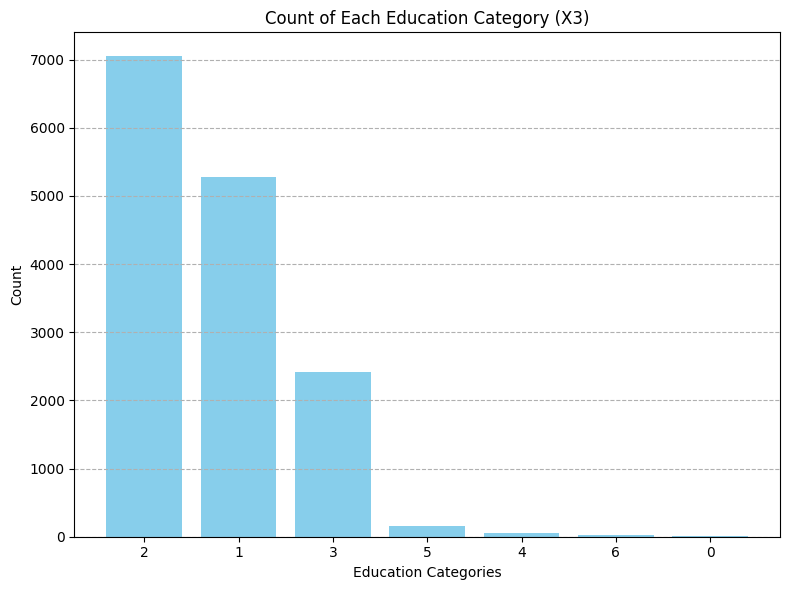

In [27]:
import matplotlib.pyplot as plt

x3_counts = df['X3'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(x3_counts.index.astype(str), x3_counts.values, color='skyblue')
plt.title('Count of Each Education Category (X3)')
plt.ylabel('Count')
plt.xlabel('Education Categories')
plt.grid(axis='y', linestyle='--', )
plt.tight_layout()
plt.show()


The distribution of values shows that categories `1`, `2`, and `3` are most common.

Rare values like `0`, `4`, `5`, and `6` suggest potential outliers or noise. These could be grouped under an “Other” category for clarity.


Before merging categories, let's examine the default rate per group:

In [28]:
for val in range(0, 7):
    default_rate = df[df['X3'].isin([val])]['Y'].mean() * 100
    print(f"Default rate for {val}: {default_rate:.2f}%\n")


Default rate for 0: 0.00%

Default rate for 1: 19.78%

Default rate for 2: 23.69%

Default rate for 3: 24.11%

Default rate for 4: 7.55%

Default rate for 5: 7.89%

Default rate for 6: 8.00%



Default rates vary across education levels:

- Group 3: 24.1%
- Group 2: 23.7%
- Group 1: 19.8%
- Groups 4, 5, 6: ~7–8%
- Group 0: 0% (very small count)

This supports the idea that grouping 0, 4, 5, and 6 may be valid, while 2 and 3 show very similar behavior.


Visualizing the default proportions for each education category helps confirm the numeric results.


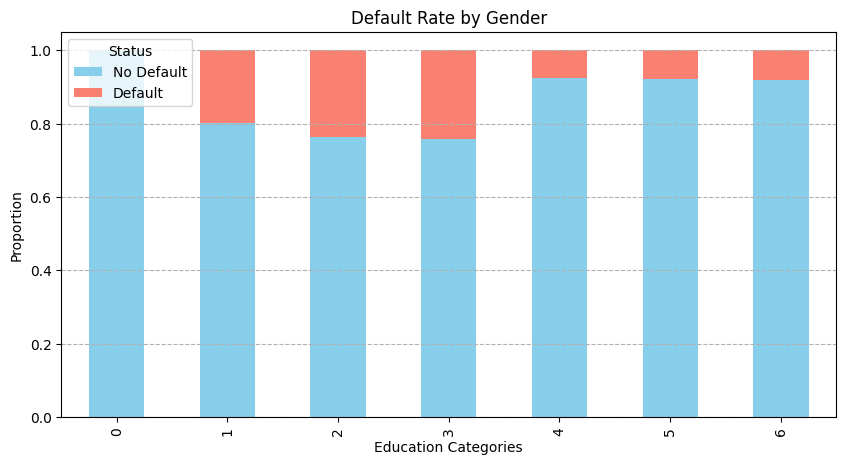

In [29]:
df.groupby('X3')['Y'].value_counts(normalize=True).unstack().plot(
    kind='bar', 
    stacked=True, 
    color=['skyblue', 'salmon'],
    figsize=(10, 5)
)

plt.title('Default Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Education Categories')
plt.legend(['No Default', 'Default'], title="Status" )
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


The plot shows that default rates are higher for education levels 2 and 3, and lower for groups 4–6.

Group 0 appears as an outlier with a sample size too small to be meaningful.

To statistically validate differences in default rates across groups, we run pairwise **Z-tests for proportions**.

This will help us determine whether certain education levels could be merged.


In [30]:
from statsmodels.stats.proportion import proportions_ztest
from itertools import combinations

group_stats = df.groupby('X3')['Y'].agg(['count', 'sum']).to_dict('index')

for g1, g2 in combinations(group_stats.keys(), 2):
    c1 = group_stats[g1]['count']
    s1 = group_stats[g1]['sum']
    c2 = group_stats[g2]['count']
    s2 = group_stats[g2]['sum']
    
    counts = [s1, s2]
    nobs = [c1, c2]
    
    z_stat, p_val = proportions_ztest(counts, nobs)
    
    print(f"X3 {g1} vs {g2}: Z = {z_stat:.3f}, p = {p_val:.4f}")


X3 0 vs 1: Z = -1.216, p = 0.2239
X3 0 vs 2: Z = -1.365, p = 0.1724
X3 0 vs 3: Z = -1.380, p = 0.1676
X3 0 vs 4: Z = -0.697, p = 0.4858
X3 0 vs 5: Z = -0.716, p = 0.4740
X3 0 vs 6: Z = -0.716, p = 0.4738
X3 1 vs 2: Z = -5.187, p = 0.0000
X3 1 vs 3: Z = -4.316, p = 0.0000
X3 1 vs 4: Z = 2.230, p = 0.0258
X3 1 vs 5: Z = 3.650, p = 0.0003
X3 1 vs 6: Z = 1.477, p = 0.1397
X3 2 vs 3: Z = -0.416, p = 0.6772
X3 2 vs 4: Z = 2.759, p = 0.0058
X3 2 vs 5: Z = 4.554, p = 0.0000
X3 2 vs 6: Z = 1.843, p = 0.0653
X3 3 vs 4: Z = 2.803, p = 0.0051
X3 3 vs 5: Z = 4.597, p = 0.0000
X3 3 vs 6: Z = 1.878, p = 0.0604
X3 4 vs 5: Z = -0.081, p = 0.9353
X3 4 vs 6: Z = -0.070, p = 0.9442
X3 5 vs 6: Z = -0.018, p = 0.9856


We tested all combinations of education levels using a two-proportion Z-test.

**Findings (p < 0.05):**
- Statistically significant differences exist between:
  - Group 1 vs 2, 3, 4, 5
  - Group 2 vs 4, 5
  - Group 3 vs 4, 5
- No statistically significant difference between:
  - Group 0 and any other group (too small)
  - Groups 4 vs 6, and 5 vs 6

**Preprocessing Notes:**
- Group **2 and 3** could be merged (similar default rates).
- Groups **4, 5, 6** could also be merged as “Other.”
- Group **0** is too small to conclude — treat with caution or consider dropping.



## X3 Summary

The `X3` feature represents **highest level of education**, an ordinal categorical variable. Although the original description lists 4 categories, our dataset contains 7.

- The distribution is **heavily skewed** toward values 1–3.
- Some categories (like 0, 4, 5, 6) are rare and show **similar default behavior**.
- Statistical testing supports **merging categories**:
  - `2 and 3` → possibly "University level"
  - `4, 5, 6` → possibly "Other"
  - `0` → too rare to evaluate confidently

For modeling, grouping and potentially encoding this feature as ordinal will likely yield better performance.

---------


## X4 - Marital Status

(1 = Married; 2 = Single; 3 = Others)

Let’s begin by examining the data type and value counts for this categorical feature.

In [31]:
df['X4'].dtype

dtype('int64')

`X4` is stored as `int64`, but it represents **nominal categorical data**.

In [32]:
df['X4'].value_counts()

X4
2    8061
1    6747
3     147
0      27
Name: count, dtype: int64

Although the dataset description states that this feature has 3 categories, we observe 4 unique values:

- 2 (Single): 8061
- 1 (Married): 6747
- 3 (Others): 147
- 0 (Unknown/Invalid?): 27

The presence of a category `0` suggests either invalid data or an undocumented class.


We visualize the distribution of `X4` values to better understand the spread and identify rare categories.


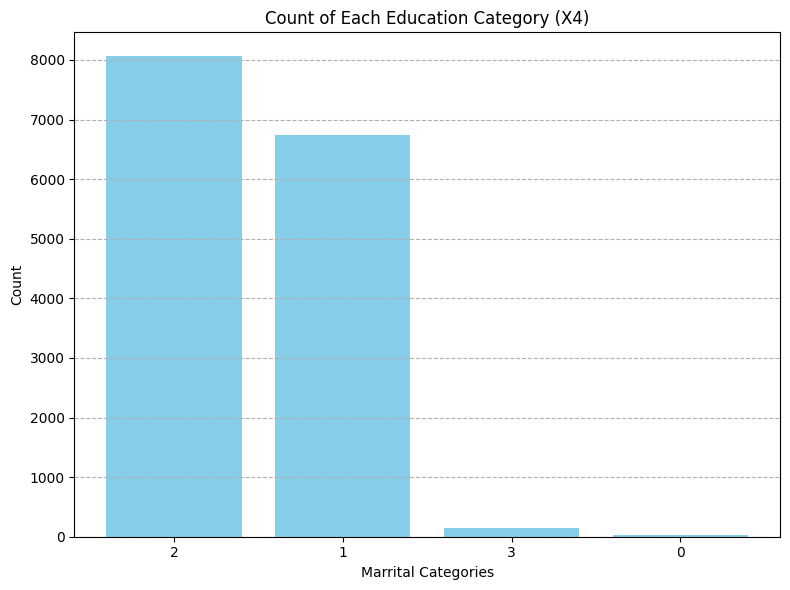

In [33]:
import matplotlib.pyplot as plt

x4_counts = df['X4'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(x4_counts.index.astype(str), x4_counts.values, color='skyblue')
plt.title('Count of Each Education Category (X4)')
plt.ylabel('Count')
plt.xlabel('Marrital Categories')
plt.grid(axis='y', linestyle='--', )
plt.tight_layout()
plt.show()


The vast majority of records fall into groups `1` and `2`. Groups `0` and `3` are relatively rare.

This suggests the potential for grouping or simplifying the feature if default behavior is similar.


As with X3, the actual data distribution does not fully align with the documentation.

To decide how to treat each class, we evaluate the default rate across all four observed groups.

In [34]:
for val in range(0, 4):
    default_rate = df[df['X4'].isin([val])]['Y'].mean() * 100
    print(f"Default rate for {val}: {default_rate:.2f}%\n")

Default rate for 0: 3.70%

Default rate for 1: 22.96%

Default rate for 2: 21.39%

Default rate for 3: 27.89%



**Default rate per group:**

- Group 0: 3.70% (very low, likely unreliable due to low count)
- Group 1: 22.96%
- Group 2: 21.39%
- Group 3: 27.89%

Group 3 shows the highest default rate, while groups 1 and 2 have similar behavior. Group 0 may represent noise.


We visualize the default proportions per marital status group:

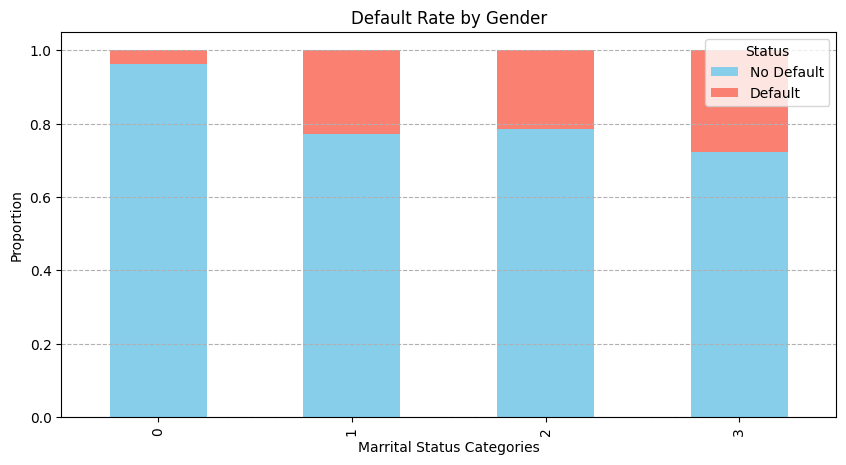

In [35]:
df.groupby('X4')['Y'].value_counts(normalize=True).unstack().plot(
    kind='bar', 
    stacked=True, 
    color=['skyblue', 'salmon'],
    figsize=(10, 5)
)

plt.title('Default Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Marrital Status Categories')
plt.legend(['No Default', 'Default'], title="Status" )
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


The plot confirms that groups 1 and 2 have similar default proportions, while group 3 has a higher rate.

Group 0 again appears to be an outlier with a small count and low default.

To statistically verify these observations, we conduct pairwise two-proportion Z-tests between all category combinations.


In [36]:
from statsmodels.stats.proportion import proportions_ztest
from itertools import combinations

group_stats = df.groupby('X4')['Y'].agg(['count', 'sum']).to_dict('index')

for g1, g2 in combinations(group_stats.keys(), 2):
    c1 = group_stats[g1]['count']
    s1 = group_stats[g1]['sum']
    c2 = group_stats[g2]['count']
    s2 = group_stats[g2]['sum']
    
    counts = [s1, s2]
    nobs = [c1, c2]
    
    z_stat, p_val = proportions_ztest(counts, nobs)
    
    print(f"X3 {g1} vs {g2}: Z = {z_stat:.3f}, p = {p_val:.4f}")


X3 0 vs 1: Z = -2.377, p = 0.0175
X3 0 vs 2: Z = -2.239, p = 0.0251
X3 0 vs 3: Z = -2.700, p = 0.0069
X3 1 vs 2: Z = 2.295, p = 0.0217
X3 1 vs 3: Z = -1.405, p = 0.1601
X3 2 vs 3: Z = -1.902, p = 0.0571


**Findings (p < 0.05 threshold):**

- Significant difference between group 0 and all other groups (1, 2, 3)
- Significant difference between group 1 and group 2
- No significant difference between:
  - Group 1 and 3
  - Group 2 and 3

This suggests groups 1 and 2 are similar in default behavior, while group 3 behaves slightly differently but not significantly so.

**PREPROCESSING NOTES:**

- Consider grouping 1 and 3 together, as there's no statistically significant difference.
- Group 0 may be dropped or treated as “unknown.”
- This feature is nominal categorical, so one-hot encoding may be appropriate for modeling.

## X4 Summary

The `X4` feature represents marital status, but contains 4 observed categories instead of the expected 3:

- The extra group `0` may represent invalid or missing data.
- Groups 1 and 2 dominate the dataset and show very similar default rates.
- Statistical tests support merging groups 1 and 3, and possibly removing group 0 due to low count and inconsistent behavior.

Encoding this feature using one-hot encoding is suitable, given its nominal nature.

-----------

## X5 - Age (year).

Age can be a continuous number, but in this situation, it is numerical and discrete. With that said the order of age has meaning.

Let's take a look as some descriptive statistics and visualize the distribution of age for customers.


In [37]:
df['X5'].dtype

dtype('int64')

In [38]:
df['X5'].sort_values(ascending=True).unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75])

In [39]:
df['X5'].describe().T

count    14982.000000
mean        35.378588
std          9.226433
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: X5, dtype: float64

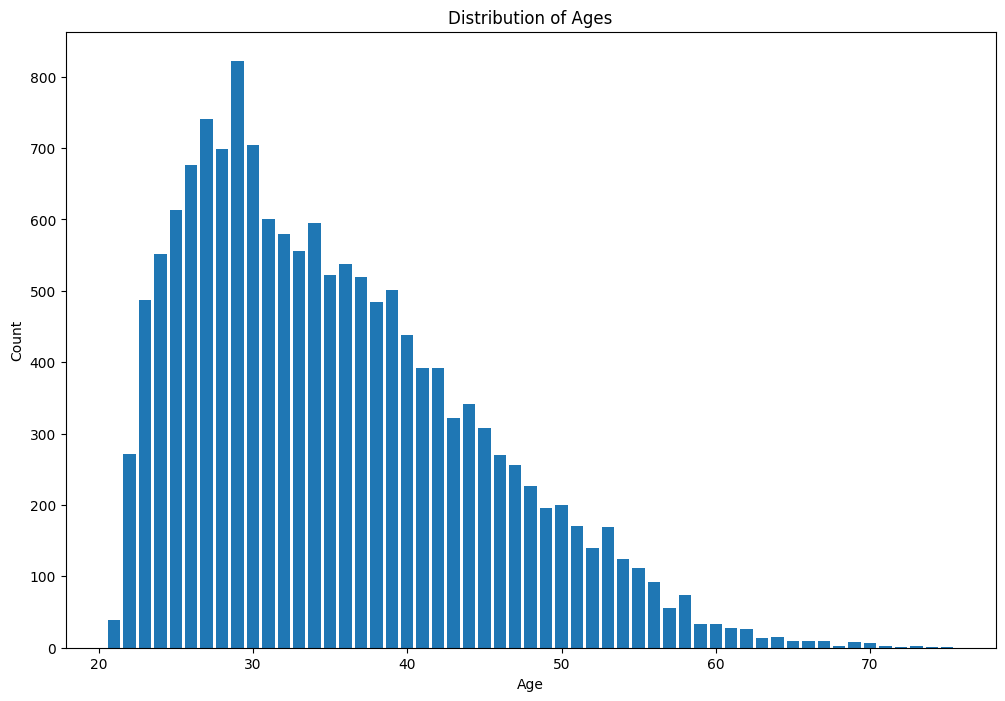

In [40]:
import matplotlib.pyplot as plt

x5 = df['X5'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(x5.index, x5.values)
plt.title('Distribution of Ages')
plt.ylabel("Count")
plt.xlabel('Age')
plt.show()

The youngest individual is 21, and the oldest is 75, with an average age around 35 years old.

The majority of individuals are between 28 and 41 years of age.  
The distribution shows a mild positive skew, with relatively few individuals over 60.

Let's use a violin plot to see if there is any clear difference between default or no default for different ages.


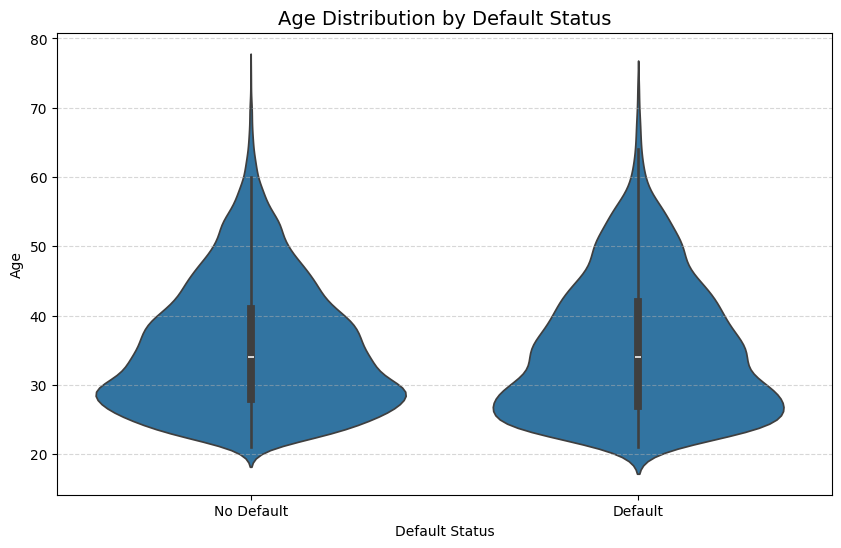

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.violinplot(
    x='Y', 
    y='X5', 
    data=df, 
    inner='box', 
)

plt.xticks([0, 1], ['No Default', 'Default']) 
plt.title('Age Distribution by Default Status', fontsize=14)
plt.xlabel('Default Status')
plt.ylabel('Age')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Visually, there is little difference between individuals who do or don't default based on age alone.

We can perform a Spearman correlation test and calculate a p-value to assess statistical significance.


In [42]:
from scipy.stats import spearmanr

corr, p = spearmanr(df['X5'], df['Y'])

print("Spearman Correlation:", corr)
print("P-value:", p)

if p < 0.05:
    print ('Reject Null Hypothesis. Correlation value is unlikely due to random chance.')
else:
    print('Accept Null Hypotheeses. There is no statistically significant relationship')

Spearman Correlation: -0.01637774546427153
P-value: 0.045003764292487154
Reject Null Hypothesis. Correlation value is unlikely due to random chance.


While the p-value is below the 0.05 threshold, it is only marginally significant.

If the threshold were reduced to 0.01, we would fail to reject the null hypothesis.  
The Spearman correlation value is close to zero, suggesting an extremely weak — and likely not practically significant — relationship.

**PREPROCESSING NOTES:**

- The X5 feature representing age appears to have little to no predictive power.
- Dropping it completely may improve model performance and simplify the feature set.


## X5 Summary:

Age is a distribution of mildly positively skewed values ranging from 21 to 75, with an average around 35.

From visual inference and statistical testing, we found age to have little to no predictive power.

Removing it entirely may simplify the dataset and improve model performance.


--------------------

## X6–X11: History of Past Payment

We tracked past monthly payment records from April to September 2005:

- **X6**: Repayment status in September 2005  
- **X7**: Repayment status in August 2005  
- …  
- **X11**: Repayment status in April 2005  

**Repayment status codes:**
- **-2**: No consumption  
- **-1**: Paid in full  
- **0**: Revolving credit (used but not fully repaid, not late)  
- **1–8**: Months late in making minimum payment  
- **9**: ≥ 9 months late

In [43]:
df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].astype(object).describe()

,X6,X7,X8,X9,X10,X11
count,14982,14982,14982,14982,14982,14982
unique,11,10,11,11,10,10
top,0,0,0,0,0,0
freq,7398,7913,7915,8257,8453,8081


In [44]:
repayment_cols = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
rep_set = set()

for col in repayment_cols:
    rep_set.update(int(val) for val in df[col].unique())
    
sorted_set = sorted(rep_set)
sorted_set


[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

We visualize the distribution of repayment statuses for each month (X6–X11) to see common patterns and detect unusual repayment behaviors.

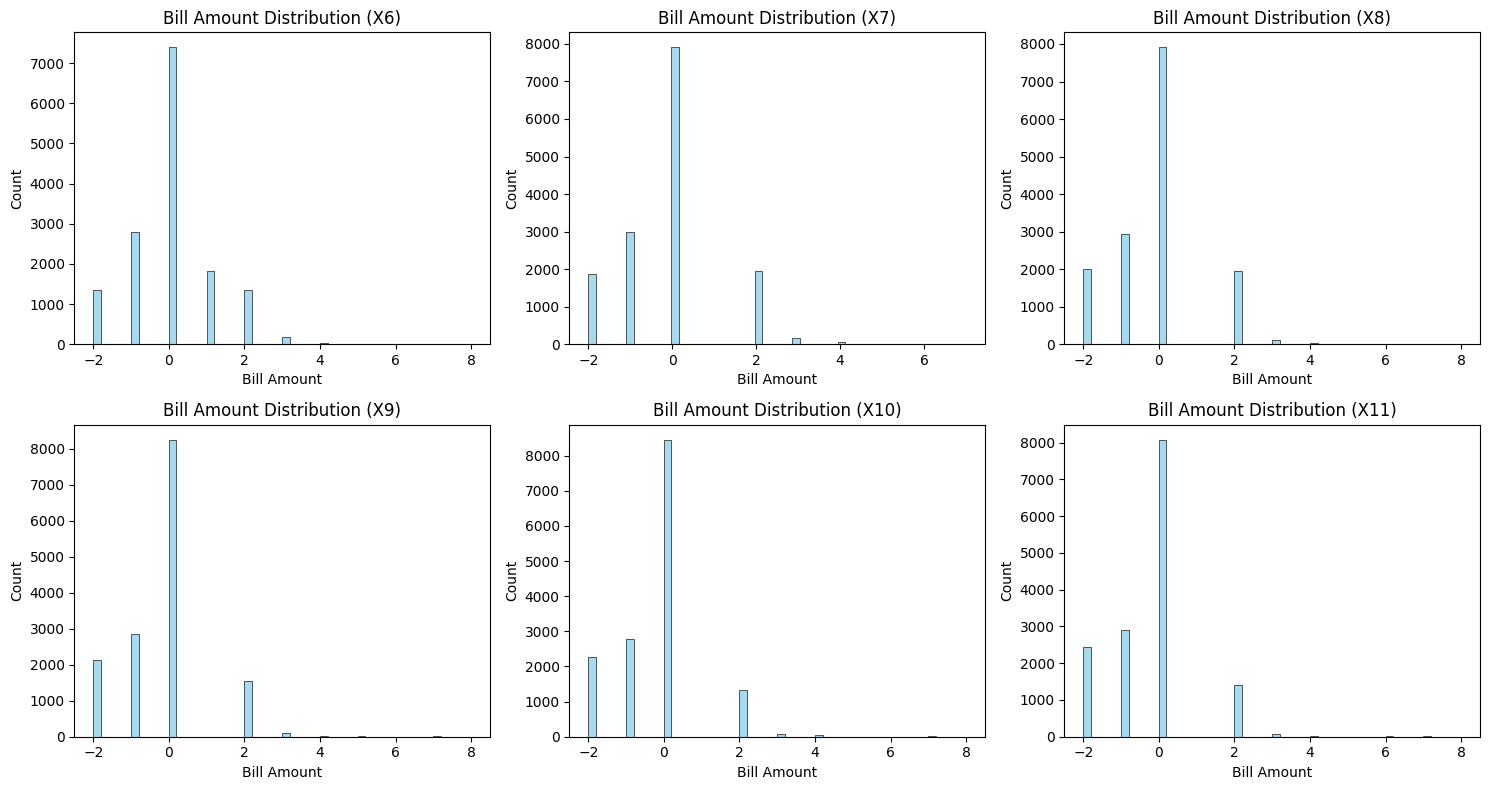

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

bill_cols = ['X6','X7','X8','X9','X10','X11']  # Apr → Sep

plt.figure(figsize=(15, 8))
for i, col in enumerate(bill_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, color='skyblue')
    plt.title(f"Bill Amount Distribution ({col})")
    plt.xlabel("Bill Amount")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()



Across all months, repayment status **0** dominates — most customers use credit without fully paying it off, but are not late.  

A notable portion of customers are either **not using credit at all (-2)** or **fully paying it off (-1)** each month.  

Missed payments for more than 2 consecutive months are rare events, occurring in only a small segment of customers.


We combine all repayment statuses across all months into a single view to identify overall repayment behavior frequencies.


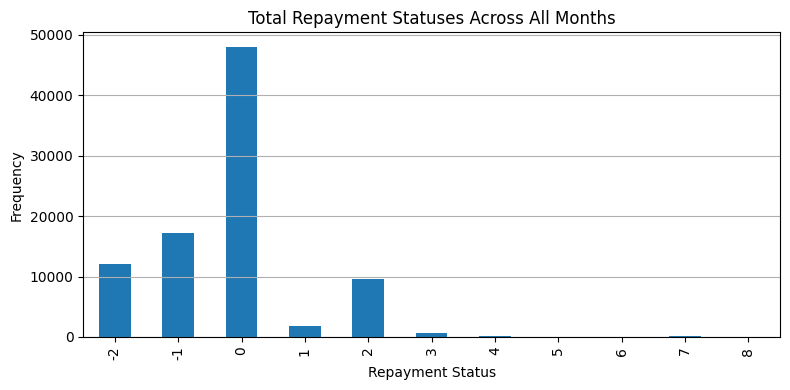

In [46]:
all_statuses = df[repayment_cols].values.flatten()
pd.Series(all_statuses).value_counts().sort_index().plot(kind='bar', figsize=(8,4), title='Total Repayment Statuses Across All Months')
plt.xlabel('Repayment Status')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Repayment status **0** is the most common across all months, followed by **-1** and **-2**.

Longer delays (status ≥ 3) are extremely rare, suggesting that chronic delinquency is not widespread in this dataset.


We calculate the **standard deviation of repayment status per customer** to measure repayment stability over time.


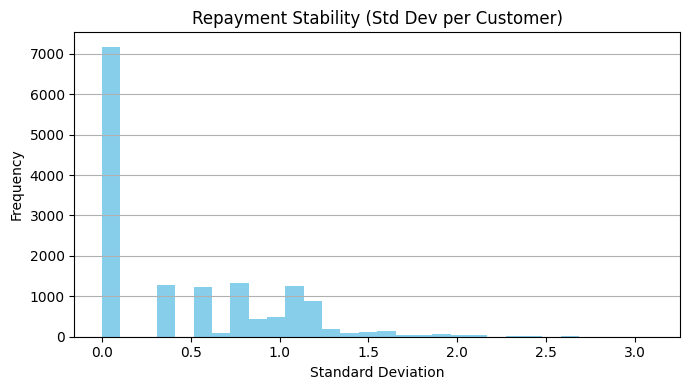

In [47]:
df['repayment_std'] = df[repayment_cols].std(axis=1)
df['repayment_std'].plot(kind='hist', bins=30, figsize=(7,4), color='skyblue', title='Repayment Stability (Std Dev per Customer)')
plt.xlabel('Standard Deviation')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


A large number of customers have a standard deviation near 0, indicating stable repayment behavior.  

Higher deviations indicate customers who swing between paying in full (-1) and missing multiple months, reflecting irregular repayment habits.

We analyze the relationship between repayment status and **default rate** to see how late payments correlate with default likelihood.



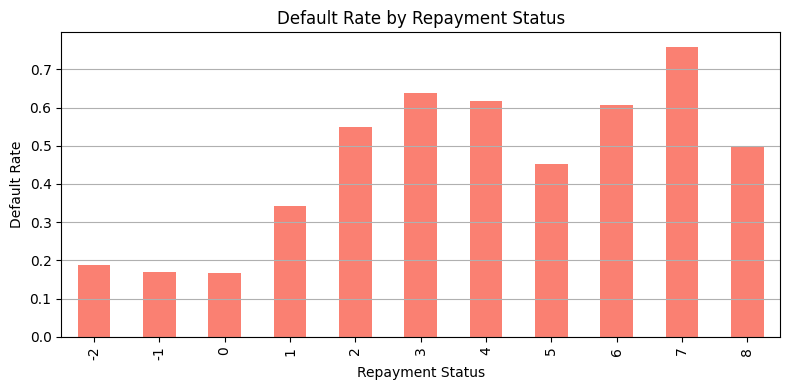

In [48]:
melted = df.melt(id_vars='Y', value_vars=repayment_cols, value_name='RepaymentStatus')
default_rate = melted.groupby('RepaymentStatus')['Y'].mean()
default_rate.plot(kind='bar', color='salmon', figsize=(8,4), title='Default Rate by Repayment Status')
plt.ylabel('Default Rate')
plt.xlabel('Repayment Status')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Default rates increase steadily with repayment status.  
- Customers with **status 0 or lower** have the lowest default rates.  
- Default risk rises sharply once repayment status exceeds **2 months late**.

We run Chi-square tests to measure the association between each repayment month (X6–X11) and the target variable `Y` (default).


In [49]:
import researchpy as rp

repayment_cols = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']

for col in repayment_cols:
    print(f"\n=== {col} vs Y ===")
    summary, results = rp.crosstab(df[col], df['Y'], test='chi-square')
    print("Chi-square test:")
    print(results)
    


=== X6 vs Y ===
Chi-square test:
                 Chi-square test    results
0  Pearson Chi-square ( 10.0) =   2676.4985
1                     p-value =      0.0000
2                  Cramer's V =      0.4227

=== X7 vs Y ===
Chi-square test:
                Chi-square test    results
0  Pearson Chi-square ( 9.0) =   1779.6456
1                    p-value =      0.0000
2                 Cramer's V =      0.3447

=== X8 vs Y ===
Chi-square test:
                 Chi-square test    results
0  Pearson Chi-square ( 10.0) =   1289.1925
1                     p-value =      0.0000
2                  Cramer's V =      0.2933

=== X9 vs Y ===
Chi-square test:
                 Chi-square test    results
0  Pearson Chi-square ( 10.0) =   1121.3519
1                     p-value =      0.0000
2                  Cramer's V =      0.2736

=== X10 vs Y ===
Chi-square test:
                Chi-square test    results
0  Pearson Chi-square ( 9.0) =   1038.7443
1                    p-value =      0.0000


There is a **clear decay in association** from X6 → X11 (most recent → oldest month), confirming that recent repayment behavior is more predictive of default.

- **X6** (September) has the strongest association.
- X10 and X11 show the weakest associations, suggesting they may be combined or down-weighted in modeling.

## X6–X11 Summary

- Most customers maintain repayment statuses of 0, -1, or -2 across months.
- Longer delays (> 2 months late) are rare.
- Higher repayment delay is associated with higher default risk.
- More recent months (X6, X7) are more predictive than older ones (X10, X11).

**Potential preprocessing steps:**
- Weight recent months higher.
- Combine weaker months into a summary metric (e.g., average delinquency).
- Confirm predictive value via logistic regression coefficients.

-----------


## X6 – X11: Amount of Previous Payment (NT dollars)

X6 = amount paid in September 2005  
X7 = amount paid in August 2005  
X8 = amount paid in July 2005  
X9 = amount paid in June 2005  
X10 = amount paid in May 2005  
X11 = amount paid in April 2005  

Let's first take a look at some descriptive statistics for these features.

In [50]:
df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].describe()

,X12,X13,X14,X15,X16,X17
count,14982.000000,14982.000000,1.498200e+04,14982.000000,14982.000000,14982.000000
mean,51420.509478,49466.538780,4.719617e+04,43607.400214,40466.353157,39007.492725
std,73512.149877,71165.076474,6.948419e+04,64566.140759,60342.446708,59141.712785
min,-165580.000000,-69777.000000,-2.470200e+04,-81334.000000,-61372.000000,-73895.000000
25%,3595.500000,3099.250000,2.779250e+03,2360.250000,1747.500000,1216.500000
50%,23118.500000,21700.500000,2.034600e+04,19285.000000,18431.000000,17349.500000
75%,67807.000000,64449.250000,6.082825e+04,55711.000000,50697.500000,49483.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


From the descriptive statistics, we observe:

- All payment amounts are heavily right-skewed.
- Most customers make relatively small payments, with a few very large outliers.
- Many customers have **zero payments** in certain months.
- The overall distribution shapes are consistent across months, suggesting stable population-level payment patterns.


Next, let's visualize the distribution of payment amounts for each month (X6 → X11).


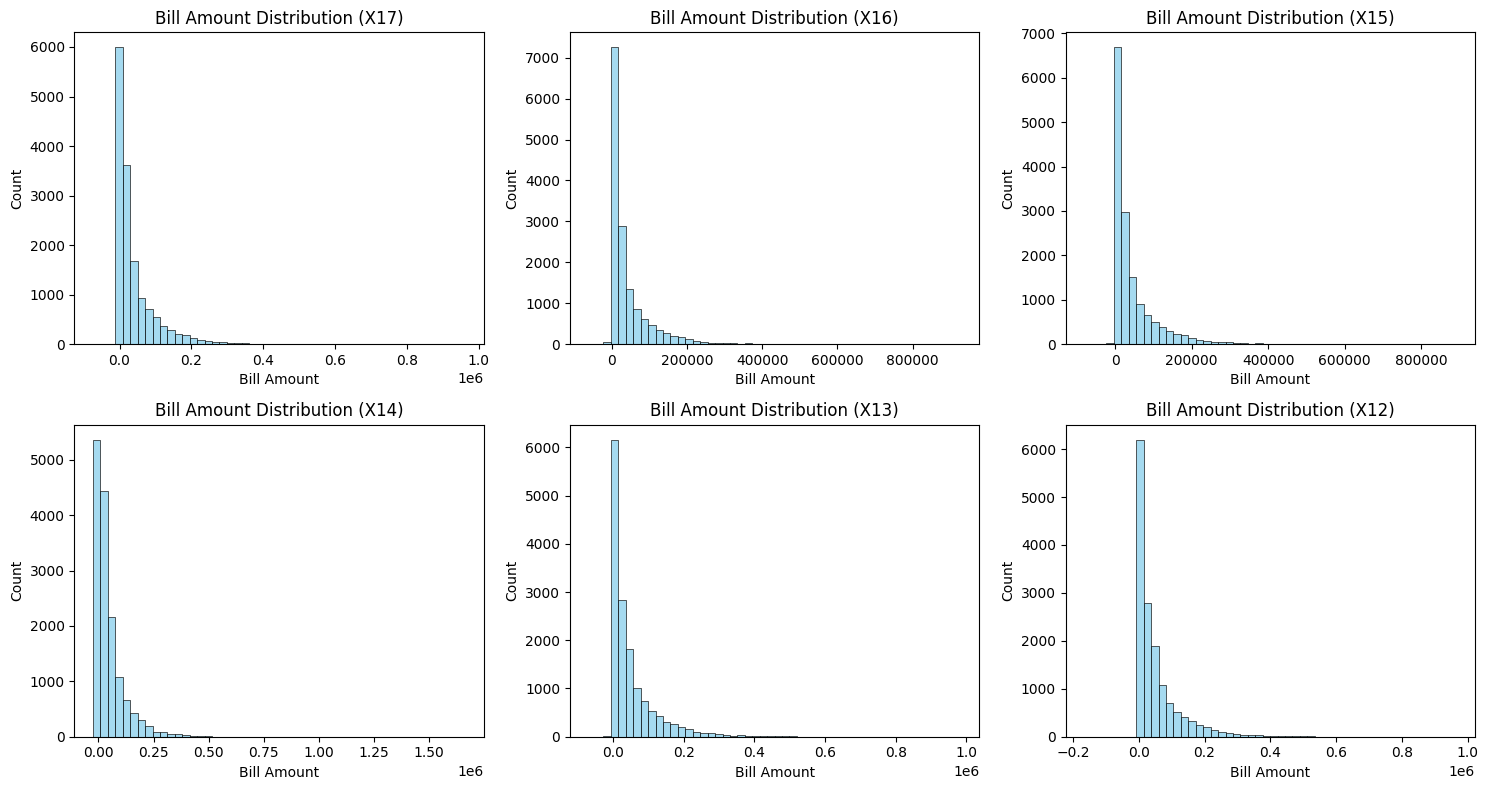

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bill amount columns for April → September
bill_cols = ['X17','X16','X15','X14','X13','X12']  # Apr → Sep

plt.figure(figsize=(15, 8))
for i, col in enumerate(bill_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, color='skyblue')
    plt.title(f"Bill Amount Distribution ({col})")
    plt.xlabel("Bill Amount")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


All payment amount distributions are heavily right-skewed.

The majority of customers have low or zero payments, with a long tail toward very large amounts.  
Some outliers exceed NT$1,000,000.  
Distributions across months are very similar.

**Preprocessing note:** Applying a log transformation (e.g., `log(X+1)`) before modeling could reduce skewness and stabilize variance.

Let's check how average payment amounts change over time (April → Sept).


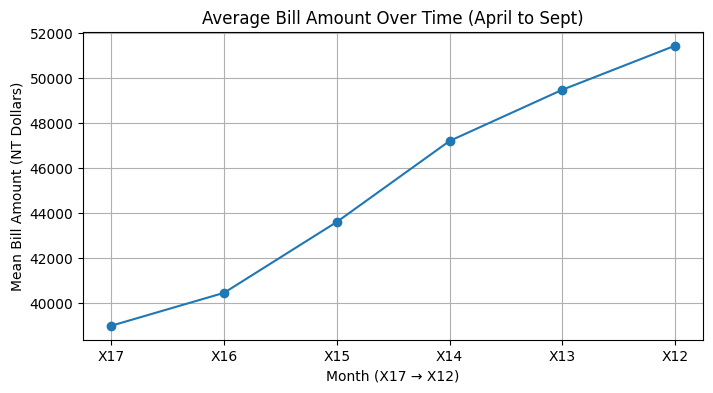

In [52]:
bill_cols = ['X17','X16','X15','X14','X13','X12'] 
df[bill_cols].mean().plot(marker='o', figsize=(8, 4))
plt.title('Average Bill Amount Over Time (April to Sept)')
plt.ylabel('Mean Bill Amount (NT Dollars)')
plt.xlabel('Month (X17 → X12)')
plt.grid(True)
plt.show()


On average, payment amounts tend to be higher in more recent months (closer to September) compared to earlier months (April).  

Possible interpretations:
- Customers may be paying more recently due to higher outstanding balances.
- Spending may be increasing, requiring larger payments.
- Payment patterns may reflect financial strain leading up to default.


Now let's calculate the correlation between each payment amount (X6–X11) and default status (Y).

In [53]:
from scipy.stats import pointbiserialr

for col in bill_cols:
    corr, p = pointbiserialr(df[col], df['Y'])
    print(f"{col}: correlation = {corr:.4f}, p-value = {p:.4f}")


X17: correlation = -0.0057, p-value = 0.4853
X16: correlation = -0.0102, p-value = 0.2114
X15: correlation = -0.0132, p-value = 0.1070
X14: correlation = -0.0187, p-value = 0.0222
X13: correlation = -0.0174, p-value = 0.0335
X12: correlation = -0.0233, p-value = 0.0043


Correlation results show:

- **X6 (Sept)** has the strongest correlation with default (~0.317).  
- Correlation gradually decreases as we move further back in time toward X11 (April).
- All p-values are statistically significant (p < 0.05).

**Interpretation:**  
Recent payment amounts are more predictive of default.  
Customers who default tend to have lower recent payments, especially in September.  
Older payment data still has predictive value but is weaker.



## X6 – X11 Summary:

Payment amounts from April to September 2005 are heavily right-skewed, with many zero or low payments and a few extreme outliers.  

Recent months (X6, X7) show stronger correlation with default than earlier months (X10, X11).  
Applying a log transformation is recommended to normalize distributions before modeling.


---------

## X18 – X23: Amount of Previous Payment (NT$)

These six features record how much each customer actually paid in the six months prior to September 2005:

- X18: September 2005  
- X19: August 2005  
- X20: July 2005  
- X21: June 2005  
- X22: May 2005  
- X23: April 2005  

Let's start by reviewing some descriptive statistics for these variables.

In [59]:
df[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].describe()

,X18,X19,X20,X21,X22,X23
count,14982.000000,1.498200e+04,14982.000000,14982.000000,14982.000000,14982.000000
mean,5704.245962,5.885975e+03,5355.789147,4955.838740,4876.290615,5310.546789
std,17213.812677,2.400906e+04,19437.392734,15849.417163,15342.814841,17673.586426
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.767500e+02,396.000000,292.000000,257.000000,100.000000
50%,2100.000000,2.006000e+03,1805.500000,1500.000000,1512.000000,1500.000000
75%,5008.750000,5.000000e+03,4500.000000,4039.500000,4047.250000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,422000.000000


From the descriptive statistics we see:

- All six features are highly right-skewed, with means far above the medians.  
- Many customers have payments of zero, indicating no payment activity for that month.  
- A small number of extreme outliers exceed NT$1,000,000.  
- The distribution shapes are very similar across months.

**Preprocessing note:** Applying a log transformation (e.g., `log(X+1)`) could help reduce skewness and normalize these distributions for modeling.


Next, let's plot the distribution of payment amounts for each month to get a clearer picture.


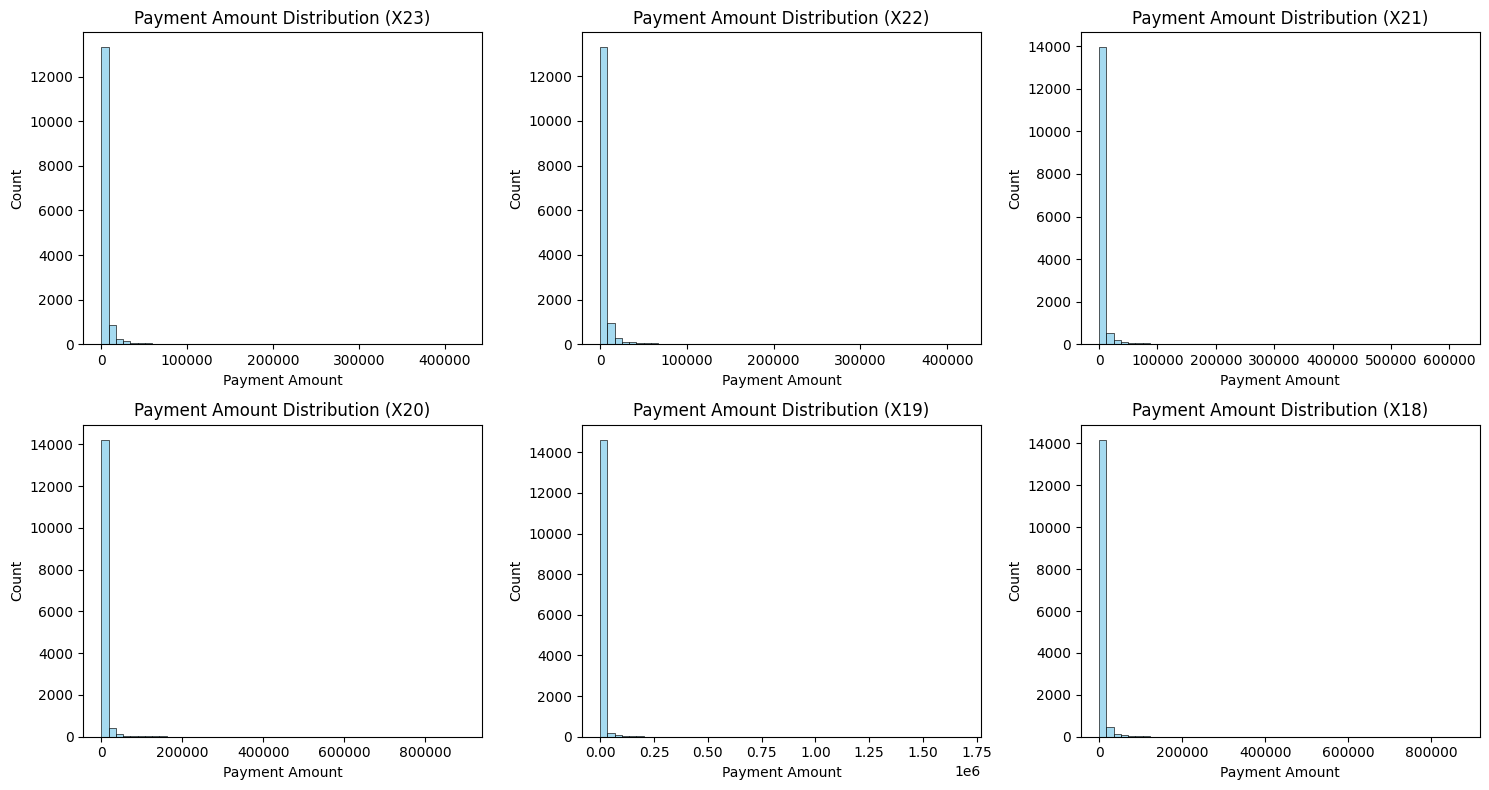

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Payment amount columns for Apr → Sep
payment_cols = ['X23','X22','X21','X20','X19','X18']  # Apr → Sep

# ✅ Histograms for each month
plt.figure(figsize=(15, 8))
for i, col in enumerate(payment_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, color='skyblue')
    plt.title(f"Payment Amount Distribution ({col})")
    plt.xlabel("Payment Amount")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


From the histograms we see:

- The tallest bars are at or near zero, reflecting customers who made no or very small payments.  
- There is a long right tail caused by rare, very large payments.  
- The overall distribution shapes are nearly identical for X18–X23, suggesting consistent payment patterns across months.


Now, let's examine how average payment amounts change over time from April (X23) through September (X18).


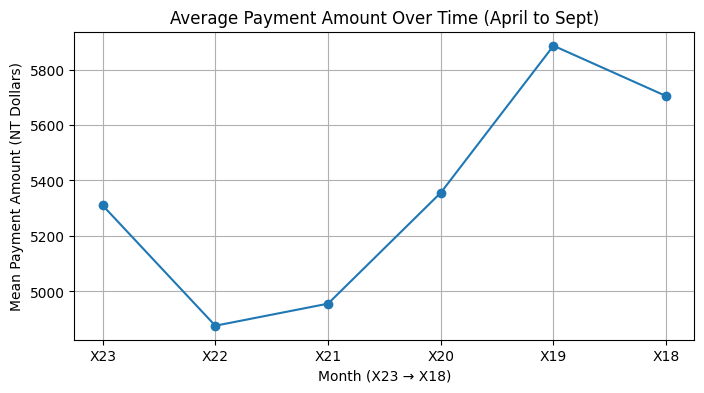

In [56]:
payment_cols = ['X23','X22','X21','X20','X19','X18']  # Apr → Sep
df[payment_cols].mean().plot(marker='o', figsize=(8, 4))
plt.title('Average Payment Amount Over Time (April to Sept)')
plt.ylabel('Mean Payment Amount (NT Dollars)')
plt.xlabel('Month (X23 → X18)')
plt.grid(True)
plt.show()

From the trend plot we see:

- Average payments range from about NT$4,900 to NT$5,900.  
- There is a dip in May (X22), followed by a steady rise that peaks in August (X19).  
- A small drop occurs again in September (X18).

This could indicate increased repayment efforts mid-year, followed by a decline — potentially due to financial strain, billing cycle changes, or policy cutoffs.


Finally, let's measure the correlation between each payment amount and the default target (Y).


In [57]:
from scipy.stats import pointbiserialr

# Payment amount columns from April to September
payment_cols = ['X23','X22','X21','X20','X19','X18']  # April → Sept

# Run point-biserial correlation against binary target Y
for col in payment_cols:
    corr, p = pointbiserialr(df[col], df['Y'])
    print(f"{col}: correlation = {corr:.4f}, p-value = {p:.4f}")


X23: correlation = -0.0553, p-value = 0.0000
X22: correlation = -0.0500, p-value = 0.0000
X21: correlation = -0.0624, p-value = 0.0000
X20: correlation = -0.0482, p-value = 0.0000
X19: correlation = -0.0567, p-value = 0.0000
X18: correlation = -0.0742, p-value = 0.0000


From the correlation results we see:

- All features have a weak but statistically significant **negative correlation** with default status.  
- The most recent payment (X18) has the strongest correlation (-0.0742).  
- Earlier months (e.g., X20–X23) are slightly weaker in predictive power.  

**Interpretation:** Customers who make higher recent payments are less likely to default.

## X18 – X23 Summary

- Heavy right-skew with many zero or small payments and a few very large outliers.  
- Distribution shapes are stable across months.  
- Slight mid-year peak in average payments, followed by a decline in September.  
- More recent payments have slightly higher predictive power for default.  
- Consider log transformation before modeling to address skewness.

-----